# Module 3: Data Exploration

## 3.1 Summary Statistics

In [2]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns=['sepal length', 'sepal width','petal length', 'petal width','class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


In [4]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [5]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
print('Covariance:')
data.cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [7]:
print('Correlation:')
data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 3.2 Data Visualization

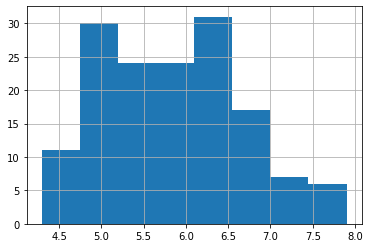

In [8]:
%matplotlib inline

data['sepal length'].hist(bins=8)

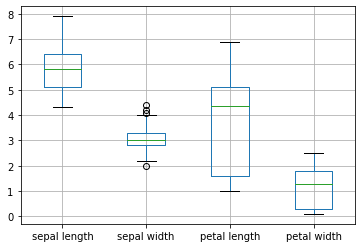

In [9]:
data.boxplot()

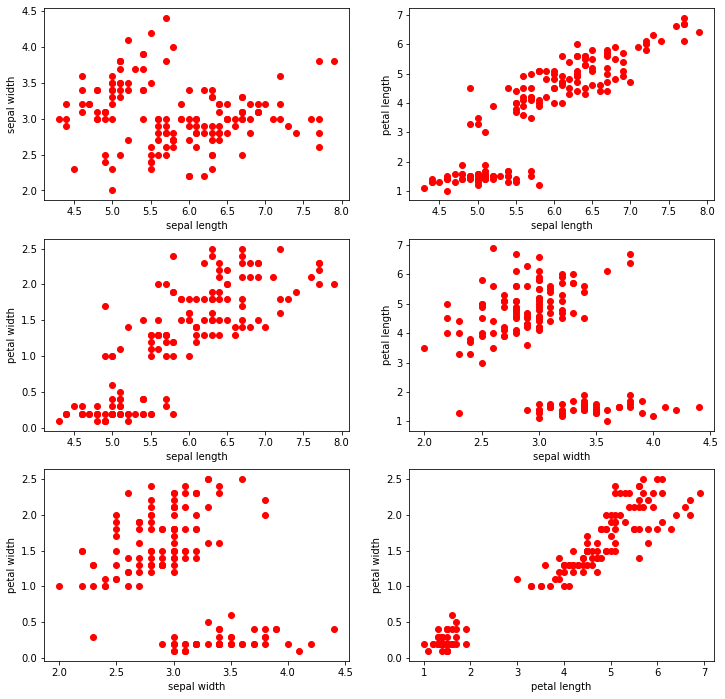

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]],color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index=index+1

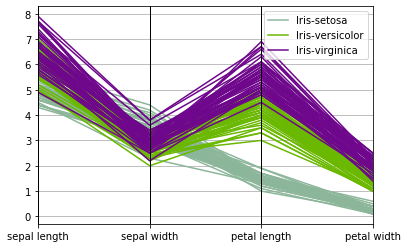

In [11]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data,'class')

# Module 4: Data Preprocessing

## 4.1 Data Quality Issues

In [12]:
import pandas as pd

data = pd.read_csv('breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chroma tin', 'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1) 
print('Number of instances = %d' % (data.shape[0])) 
print('Number of attributes = %d' % (data.shape[1])) 
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chroma tin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### 4.1.1 Missing Values

In [13]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print ('Number of missing values: ')
for col in data.columns:
    print('\t%s : %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values: 
	Clump Thickness : 0
	Uniformity of Cell Size : 0
	Uniformity of Cell Shape : 0
	Marginal Adhesion : 0
	Single Epithelial Cell Size : 0
	Bare Nuclei : 16
	Bland Chroma tin : 0
	Normal Nucleoli : 0
	Mitoses : 0
	Class : 0


In [14]:
data2 =data['Bare Nuclei']

print('Before replacing missing values : ')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\n After replacing missing values : ' )
print(data2[20:25])

Before replacing missing values : 
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

 After replacing missing values : 
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object


In [15]:
print ('Number of rows in original data = %d' %(data.shape[0]))

data2=data.dropna()
print('Number of rows after discarding missing values = %d'% (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### 4.1.2 Outliers

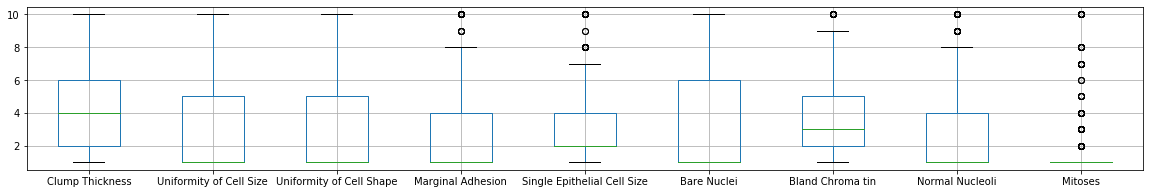

In [10]:
%matplotlib inline

data2= data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric (data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

In [11]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chroma tin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [12]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z>-3).sum(axis=1)==9)&((Z<=3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values =%d' %(Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values =632


### 4.1.3 Duplicate Data

In [13]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chroma tin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [14]:
print ('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print ('Number of rows after discarding duplicates = %d' %(data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


### 4.2 Aggregation

Text(0.5, 1.0, 'Daily Precipation (variance = 0.0530)')

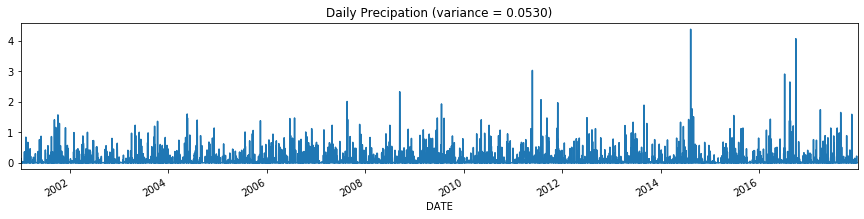

In [22]:
import pandas as pd
daily = pd.read_csv('DTW_prec.csv',header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipation (variance = %.4f)' % (daily.var()))

Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241 )')

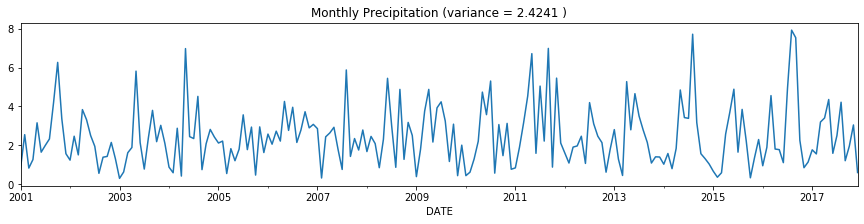

In [27]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum() 
ax = monthly.plot(kind='line',figsize=(15,3)) 
ax.set_title('Monthly Precipitation (variance = %.4f )' % (monthly.var()))

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

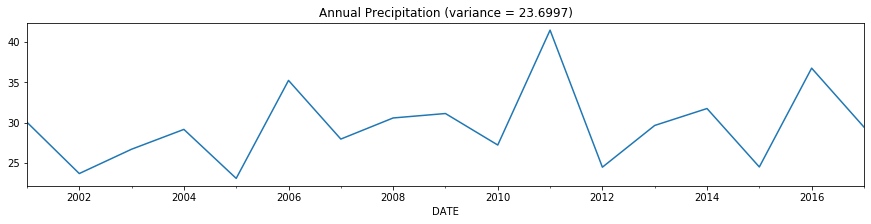

In [29]:
annual = daily.groupby(pd.Grouper(freq = 'Y')).sum()
ax = annual.plot(kind = 'line', figsize= (15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## 4.3 Sampling

In [30]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chroma tin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [31]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chroma tin,Normal Nucleoli,Mitoses,Class
607,1,1,1,1,2,1,1,1,1,2
431,5,1,1,3,4,1,3,2,1,2
498,4,1,1,1,2,1,2,1,1,2


In [32]:
sample = data.sample ( frac = 0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chroma tin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [33]:
sample = data.sample ( frac = 0.01, replace = True , random_state = 1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chroma tin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


## 4.4 Discretization

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

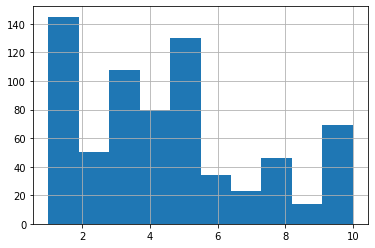

In [34]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

In [35]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

In [36]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

## 4.5 Principal Componet Analysis

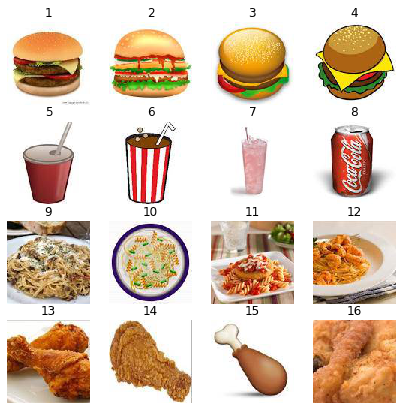

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape = (numImages,36963))

for i in range(1,numImages+1):
    filename = 'pics/Picture' +str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [41]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca =PCA(n_components  = numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food']=['burger','burger','burger','burger','drink','drink','drink','drink','pasta','pasta','pasta','pasta'
                  ,'chicken','chicken','chicken','chicken']
projected

,pc1,pc2,food
1,-1576.760243,6639.914768,burger
2,-493.748070,6398.078132,burger
3,990.122657,7236.599833,burger
4,2189.870867,9050.968064,burger
5,-7843.113587,-1061.752057,drink
6,-8498.435581,-5438.341485,drink
7,-11181.759311,-5319.773503,drink
8,-6851.883238,1125.111486,drink
9,7635.095893,-5044.070417,pasta
10,-708.093075,-529.060731,pasta


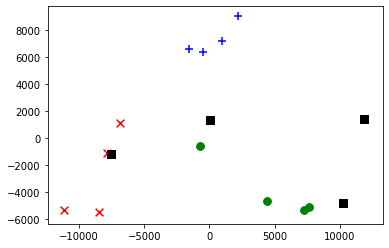

In [43]:
import matplotlib.pyplot as plt

colors={'burger':'b' , 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+' ,'drink':'x','pasta':'o','chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])